# Práctica 3: Ipyhton notebook con pruebas, resultados y análisis

<br>**Asignatura:** Prácticas de Fundamentos de Aprendizaje Automático</br>
<br>**Autores:** Albert Soler y Alfonso Sebares</br>

------------------------------------

### Notas relevantes (actualizado para la Práctica 3):
* **Importante:** La ejecución de las pruebas para `tic-tac-toe` y en especial `titanic` llevan mucho tiempo si se realizan utilizando la estrategia de validación cruzada o validación simple para 3 o más particiones. Se recomienda realizarlo con 1 para probar el funcionamiento del algoritmo si se tiene poco tiempo para probarlo.<br><br>
* Para poder manejar los notebook con Jupyter se ha seguido la [recomendación](http://jupyter.readthedocs.io/en/latest/install.html) de instalar Anaconda junto a su gestor de paquetes 'conda', en la línea de al práctica 0. Sin embargo, la version del módulo `sklearn` incluída por defecto es la 0.17. Dado que algunos módulos que hemos utilizado, como [sklearn.model_selection](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), sólo se encuentran en la versión 0.18 en adelante, sería necesario actualizar el módulo para el correcto funcionamiento de las pruebas dentro del notebook en caso de tener problemas. Bastaría con los siguientes comandos para actualizar el módulo: 
```
conda update conda
conda install scikit-learn=0.18
```
* Si se ejecuta el programa directamente sobre el intérprete de python de la máquina, también será imprescindible la versión 0.18 o más para el correcto funcionamiento de las pruebas scikit-learn.

* Se incluye el fichero `run_completo.txt` con una ejecución completa de `testapartado2.py` del Apartado 2 ya que lleva bastante tiempo la ejecución de las pruebas.

------------------------------------

### Qué hay en este notebook:

De manera estructurada por los apartados especificados con respecto al Ipython Notebook, se incluyen las explicaciones de la práctica e instrucciones necesarias para realizar las pruebas descritas en el apartado 2 del enunciado con una breve descripción y análisis de dichas pruebas al final.

------------------------------------

### Índice:
1. **Apartado 1**
    1. Generación de la población inicial con especial indicación del número de reglas por individuo consideradas
    2. Mecanismo de cruce implementado
    3. Mecanismo de mutación implementado
    4. Mecanismo de clasificación implementado<br><br>
2. **Apartado 2 - Resultados**
    1. tic-tac-toe
    2. example2
    3. ejemplo5
    4. ejemplo6
    5. titanic<br><br>
3. **Apartado 3 - Análisis de resultados**
    <br><br>
4. **Apartado 4**
------------------------------------

Primero definimos el path para que el notebook pueda utilizar los archivos de código fuente y a continuación realizamos los imports necesarios:

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from IPython.display import Image

from EstrategiaParticionado import ValidacionCruzada
from EstrategiaParticionado import ValidacionSimple
from AlgoritmoGenetico import AlgoritmoGenetico
from Main import Main

### Apartado 1
Descripción de algunos aspectos de la implementación de la práctica por apartados.

#### A. Generación de la población inicial con especial indicación del número de reglas por individuo consideradas

- Para inicializar la población nos hemos creado una función llamada: `inicializarPoblacion`. Lo primero que hacemos es crear un array de numpy de 3 dimensiones `[tam. Población][num. máximo Reglas][tam. Regla]` que inicializamos a ceros.
- Respecto al número de reglas hemos puesto de máximo 5, pero es un parámetro que recibe el clasificador AlgoritmoGenetico por lo que se puede modificar fácilmente. Hemos visto que 5 es un tamaño que nos permitía obtener buenos resultados de clasificación sin lastrar de manera significativa el tiempo de ejecucción. Hemos visto que 5 es un tamaño que nos permitía obtener buenos resultados de clasificación sin lastrar de manera significativa el tiempo de ejecucción.
- Para facilitar las pruebas y testear diferentes implementaciones en los parámetros de ejecución que establecemos con mode. Uno de ellos es "Diversidad" que puede tomar 2 valores, "default" que generamos un número aleatorio de reglas desde 1 regla hasta el máximo de reglas para cada individuo de la población. O el "maxReglas-1" que no asigna el número de reglas de cada individuo al máximo número de reglas excepto para el último que tendrá solo una regla. 
- Posteriormente, una vez hemos obtenido el número de reglas, simplemente las rellenamos aleatoriamente entre 0 y 1. El tamaño de regla, lo obtenemos sumando la máxima cantidad valores posibles de cada atributo + 1 (corresponde a la clase); para ello nos valemos de la longitud de las entradas devolver diccionario.
- Por último, las reglas no existentes para un individuo porque tiene menos que el número máximo de reglas se rellenan con NaN (Not a number).

#### B. Mecanismo de cruce implementado

Se nos plantearon 2 problemas a la hora de decidir cómo implementarlo:
- Qué hacer cuando los progenitores del cruce tienen disinto número de reglas. Dado que inicialmente nos limitábamos a truncar el número de reglas al mínimo entre los 2, se acababa perdiendo muy rápido la diversidad de los propios individuos y de la población en general a medidad que avanzaban las generaciones. Por ello decidimos simplemente cruzar el mínimo de reglas entre ambos progenitores y las restantes del que tuviera más se asignan a un hijo de manera aleatoria. Esto se puede modificar con el parámetro del "mode" "ReglasExtra", donde "default" se trunca el numero de reglas si no es igual entre padre y madre. Y "randSon" que asigna de forma aleatoria las reglas extras a los hijos.
- Qué implementar entre cruce en 1 punto, cruce en 2 puntos y cruce uniforme. Nos decantamos por cruce en un punto por su sencillez y porque conservaba la estrucura de la información mejor que cruce uniforme donde se pierde al asignar cada gen de los padres de manera aleatoria a los hijos. 


#### C. Mecanismo de mutación implementado

Optamos por implementar una mutación de la siguiente manera: se toma un 10% de la población y sobre cada individuo evaluamos la probabilidad de cruce. Si se cumple, se elige de manera aleatoria una regla válida del individuo y finalmente un bit aleatorio de dicha regla a mutar. Dicha mutación consiste en negar uno de los bits.
Inicialmente probamos con un 0,1% de probabilidad de mutación, pero en las pruebas de debug vimos que se producían muy pocas mutaciones. Subimos la prob. de mutación a un 1% para añadir algo más de diversidad.

#### D. Mecanismo de clasificación implementado

Nuestra función clasifica devuelve para cada fila (instancia) del conjunto de datos que se le pasa la clase mayoritaria que predice cada regla del mejor individuo. En caso de que ninguna regla prediga alguna clase, se ha optado por devolver una clase por defecto, en nuetro caso la 0. Esto se podría modificar, y una implementación más correcta podría ser calcular las propabilidades a priori de las clases y la que tenga más asignarla como defecto.

¿Cómo funciona? Primero recorremos el conjunto de datos, después obtenemos el número de reglas del Individuo. Y ahora simplemente tenemos que recorrer la reglas del Individuo y ver si para cada regla que clase devuelve dada la instancia. Para convertir la notación de las instancis a reglas, lo único que debemos hacer es tomar el valor de la instancia como índice de la regla + offset. Donde el offset será el número valores posibles de los atributos anteriores de la regla. Por último obtenemos las clase mayoritaria de la predicción de las reglas o si no hubiera, la clase por defecto. 


------------------------------------

### Apartado 2

Resultados de clasificación para los distintos casos pedidos en el enunciado.

**NOTA 1:** Para conjunto de datos se realizan las siguientes pruebas en batería:
1. Tamaño de población = 10 ; Generaciones = 100
2. Tamaño de población = 10 ; Generaciones = 500
3. Tamaño de población = 200 ; Generaciones = 100
4. Tamaño de población = 200 ; Generaciones = 500
5. Tamaño de población = 500 ; Generaciones = 100
6. Tamaño de población = 500 ; Generaciones = 500

**NOTA 2**: Se incluye el código especificado en el enunciado para este apartado y sus resultados en forma de tabla (% de error). El output de dicho código no se incluye en el notebook dado que ocuparía varíás páginas sin demasiada relevancia.

*Tabla de resultados de las pruebas en % de errores de media:*

|            |1    |2   | 3 | 4| 5|6|
|:------------:|:-----------:|:--------:|:---------:|:-----------:|:-----------:|:-----------:|
| **tic-tac-toe**|65,10|29,16|25,00|22,39|24,47|22.91|
| **example2**  |0,00|0,00|0,00|0,00|0,00|0,00|
| **ejemplo5**  |0,00|0,00|0,00|0,00|0,00|0,00|
| **ejemplo6**  |0,00|0,00|0,00|0,00|0,00|0,00|
| **titanic**   |21,66|24,04|20,95|16.19|23.80|18.34|

#### Parámetros previos: 

In [ ]:
###################################################################################
#[MODE] - Establece los parametros de ejecucion.
#Prints:
#   default     - sólo aquellos prints que se nos piden + resultados.
#   verbose     - prints de debug en todas las fases, máx. de información (debug).
#Diversidad:
#   default     - sin alteraciones en el rand del num. de reglas.
#   maxReglas-1 - genera 3 reglas para cada individuo salvo el último
#                 (test alta diversidad en reglas por indv.).
#Reglas_extra:
#   default     - se trunca el numero de reglas si no matchea entre padre,madre.
#   randSon     - asigna de forma random las reglas extras a los hijos.
#
#Resto:
#   random      - se seleccionan los 'fill' de manera aleatoria.
#   fitness     - se seleccionan los 'fill' en funcion del fitness
#
#CondicionTerminacion:
#   numero      - a partir de este porcentaje de acierto se termina el entrenamiento
#   no          - el entreamiento finaliza cuando se han ejecutado todas las generaciones
#Threshold:
#     numero    - a partir de este porcentaje de acierto, si se repite el fitness del 
#                 mejor individuo 10 veces se termina el entrenamiento
#     None      - el entreamiento finaliza cuando se han ejecutado todas las generaciones
###################################################################################
#parámetros de ejecución de las pruebas
mode = {'Prints':'default', 'Diversidad':'default', 'ReglasExtra':'randSons', 'Resto':'random', 'CondicionTerminacion':'100'}

In [ ]:
numParticiones = 3
porcentajeParticiones = 80
estrategiaSimple=ValidacionSimple(numParticiones, porcentajeParticiones)

#Tweaks
laplace = False
normalizar = True
separador = False

#### A. tic-tac-toe

In [ ]:
#======================================tic-tac-toe.data=====================================#
data_file = 'tic-tac-toe.data'
about = "clasificador Algoritmo Genetico"
clf_id = "GenAlg"

#Algoritmo Genetico
tamPoblacion = 10 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 10 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 200 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 200 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 500 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#Algoritmo Genetico
tamPoblacion = 500 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#### B. example2

In [ ]:
#======================================example2.data=====================================#
data_file = 'example2.data'
about = "clasificador Algoritmo Genetico"

#Algoritmo Genetico
tamPoblacion = 10 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 10 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 200 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 200 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#Algoritmo Genetico
tamPoblacion = 500 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#Algoritmo Genetico
tamPoblacion = 500 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#### C. ejemplo5

In [ ]:
#======================================ejemplo5.data=====================================#
data_file = 'ejemplo5.data'
about = "clasificador Algoritmo Genetico"


#Algoritmo Genetico
tamPoblacion = 10 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 10 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 200 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 200 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#Algoritmo Genetico
tamPoblacion = 500 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#Algoritmo Genetico
tamPoblacion = 500 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#### D. ejemplo6

In [ ]:
#======================================ejemplo6.data=====================================#
data_file = 'ejemplo6.data'
about = "clasificador Algoritmo Genetico"

#Algoritmo Genetico
tamPoblacion = 10 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 10 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 200 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 200 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#Algoritmo Genetico
tamPoblacion = 500 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#Algoritmo Genetico
tamPoblacion = 500 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#### E. titanic

In [ ]:
#======================================titanic.data=====================================#
data_file = 'titanic.data'
about = "clasificador Algoritmo Genetico"

#Algoritmo Genetico
tamPoblacion = 10 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 10 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 200 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)


#Algoritmo Genetico
tamPoblacion = 200 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

#Algoritmo Genetico
tamPoblacion = 500 #Tamaño de la poblacion
numGeneraciones = 100 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

tamPoblacion = 500 #Tamaño de la poblacion
numGeneraciones = 500 #Numero de generaciones (Condicion de terminacion)
maxReglas = 5 #Numero máximo de reglas por individuo
clasificador = AlgoritmoGenetico(tamPoblacion, numGeneraciones, maxReglas, mode)
Main.run(data_file,clasificador,about,estrategiaSimple,numParticiones,True,laplace,normalizar,separador)

------------------------------------

### Apartado 3
Análisis de resultados *(importancia del número de reglas, tamaño
de la población, generaciones, tasas de cruce y mutación. En
aquellos casos donde sea posible, se deberá de dar una
interpretación al conjunto de reglas obtenido.)*

#### Introducción

**Tasas de cruce:** 60% de la población <br>
**Mutación:** El 10% de la población, con probabilidad 1% de mutar uno de los individuos seleccionados. <br><br>
**NOTA:**
Para reducir el tiempo de ejecucción del algorimo genético hemos puesto varias variables en mode:
- CondicionTerminacion:
    - numero - a partir de este porcentaje de acierto se termina el entrenamiento 
    - no -  el entreamiento finaliza cuando se han ejecutado todas las generaciones  
- Threshold:
    - numero - a partir de este porcentaje de acierto, si se repite el fitness del mejor individuo 10 veces se termina el entrenamiento.
	- None el entreamiento finaliza cuando se han ejecutado todas las generaciones

Parámetros generales:
- **Número de reglas:** 5 para todas las pruebas de los distintos conjuntos de datos
- **Tamaño de la población:** El intervalo de 10, 200, 500 siguiendo lo que se indica en el enunciado para las pruebas. Para la implementación-prueba tratábamos siempre poblaciones de 10 individuos para que fuera viable encontrar los errores.
- **Generaciones:** De nuevo tomamos el número de generaciones que se indicaba en el enunciado, alternando entre 100 y 500 para las distintas pruebas. Encontramos un salto importante en tiempo de computación para 500 generaciones, como era de esperar.
- **Tasas de cruce:**
- **Mutación:**

#### Sobre los conjuntos de datos

- **tic-tac-toe:** Partiendo de un 65,10% de error medio con población de tamaño 10 y 100 generaciones llega a afinar hasta un 22,91% con una población de tamaño 500 y 500 generaciones. Es sin duda el conjunto de datos dónde más se aprecia mejora del fitness en las sucesivas iteraciones. Nótese la diferencia entre la gráfica `tictactoe_tamPobla10_numG500.png` y `tictactoe_tamPobla500_numG500.png` donde se aprecia que con las mismas generaciones, el aumentar la población 50 veces hace que el algoritmo necesite menos de la mitad de generaciones para alcanzar un fitness medio similar.<br><br>

- **example2, ejemplo5 y ejemplo6:** Obtenemos un error del 0%, y la ejecucción del ejemplo5 y ejemplo6 es muy rápida gracias a que llega muy rápido el mejor individuo a un fitness del 100 y terminamos el entrenamiento. Example2 tarda un poco más. Señalar que cuanto mayor es el tamaño de la población menos generaciones se necesitan para llegar a un individuo con fitness 100. <br>
Como nunca obtenedremos un individuo con un fitness mayor a 100 (siendo 100 el porcentaje de aciertos en la clasificación) no tiene sentido continuar el entrenamiento normalmente. Las raras ocasiones serían que otro individuo con un fitness muy elevado o de 100 tuviera diferentes reglas que fueran más óptimas para el conjunto de test o en el problema real. Pero nosotros no nos hemos encontrado nunca con esto al obtener porcentajes de error del 0% en cada partición y para los diferentes tamaños de población y número de generaciones. <br><br>

- **titanic:** Se puede comprobar como un mayor número de rondas no implica menor error. Esto es debido al sobreajuste que pueden realizar los algoritmos genéticos, así como puede haber llegado casi a su "tope" el algoritmo. Esta ejecucción tarda mucho es por ello que es recomendable poner en el "mode" "Threshold" en un 75 aproximadamente. Si que se puede comprobar como el valor del fitness del mejor individuo si mejora en las sucesivas pruebas con valores de población y número de generaciones más altos. (Pero es una variación muy pequeña del órden del 3%) Pero si que aumenta considerablemente el tiempo de ejecucción es por ello que creemos que la opción con mejor balance es un tamaño de población de 200 y 100 generaciones. [Debería ser el cinco veces más rápido que tamPoblacion=200 y numGeneraciones=500, y obtiene unos resultados parejos]. Aunque si sacrifica un poco de tiempo podríamos optar por tamaño de poblacion de 200 y 250 generaciones. 

------------------------------------

### Apartado 4
Gráficas de la evolución de la fase de entrenamiento para:
- Del fitness del mejor individuo de la población
- Del fitness medio de la población<br>

**NOTA:** de example2, ejemplo5 y ejemplo6 se incluyen las gráficas correspondientes pero se puede apreciar que debido a la optimización que hacemos, al resolverse en la primera generación no tiene mucho sentido la gráfica tal y como se han planteado.

Un par de anotaciones sobre las gráficas obtenidas:
- Es interesante la velocidad a la que varía la "meseta" del fitness en función del tamaño de la población.
- La crecida exponencial del fitness a lo largo de las iteraciones para un tamaño de población grande frente a una crecida más lineal para un tamaño pequeño (tictactoe). Sin embargo en titanic no se comporta igual si comparamos la última gráfica con las anteriores.

#### tic-tac-toe:

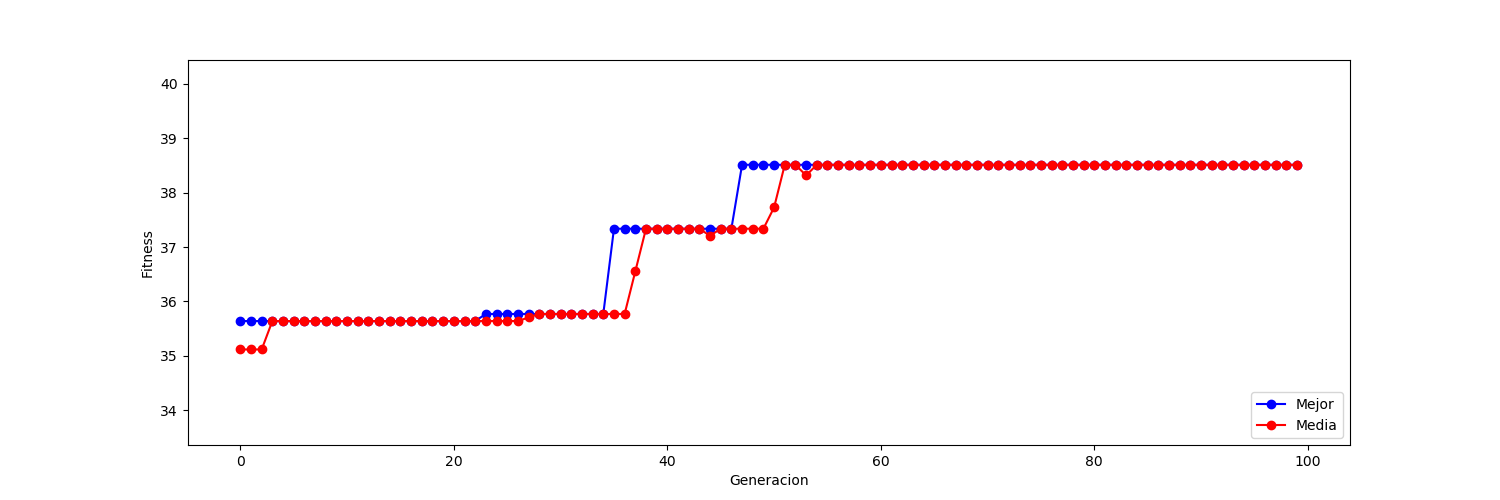

In [36]:
Image(filename="Graficas/tictactoe_tamPobla10_numG100.png")

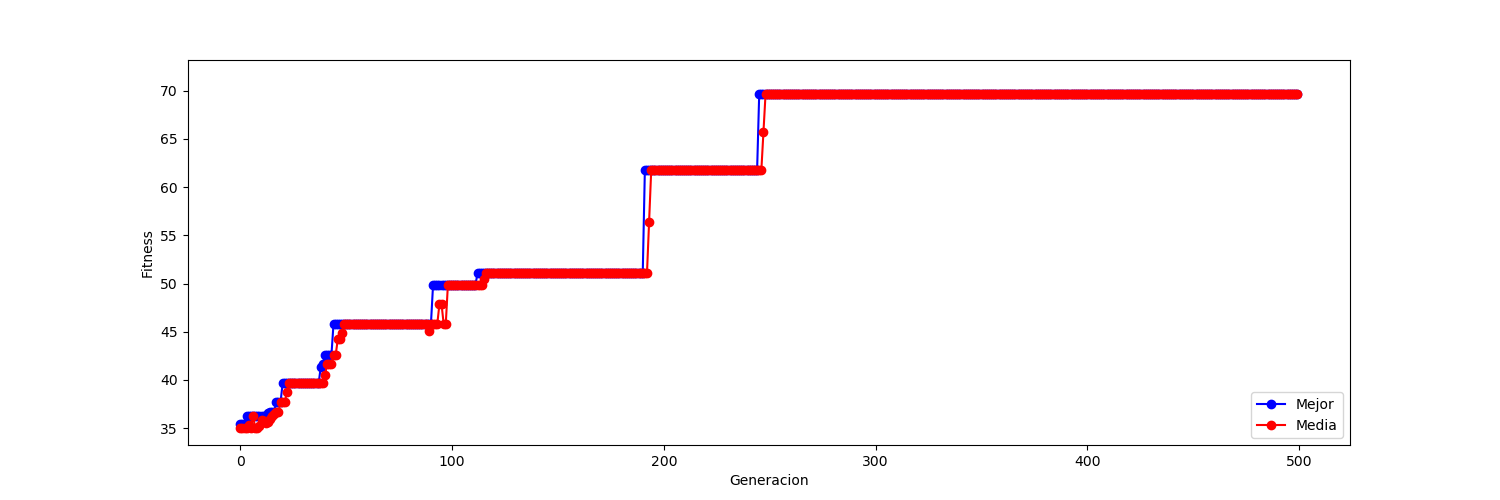

In [33]:
Image(filename="Graficas/tictactoe_tamPobla10_numG500.png")

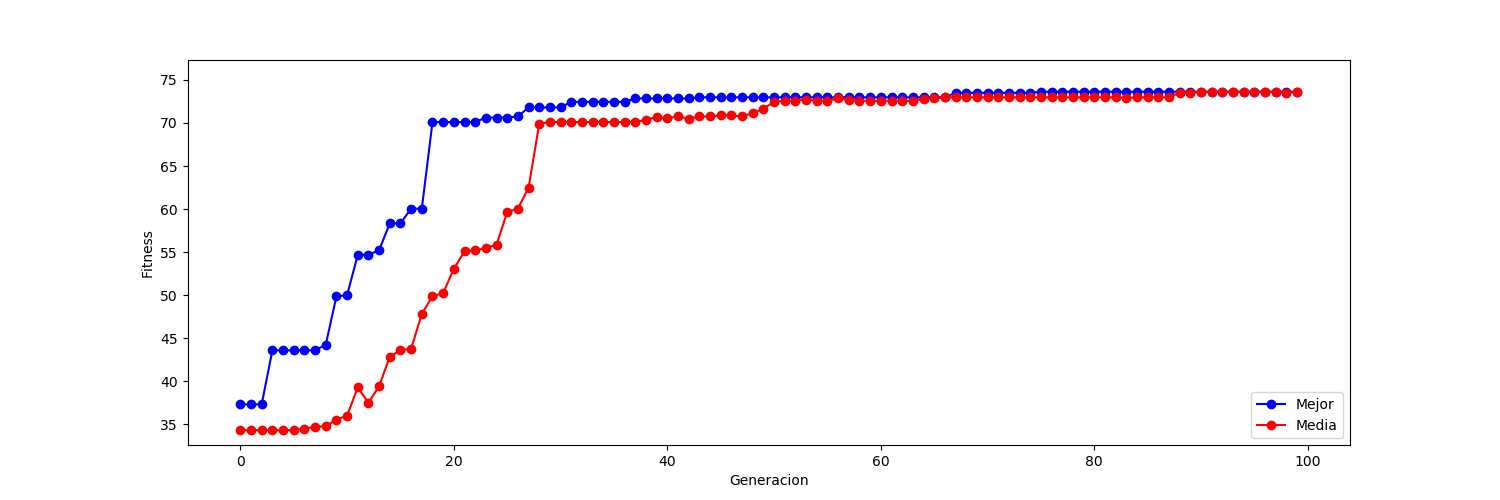

In [4]:
Image(filename="Graficas/tictactoe_tamPobla200_numG100.png")

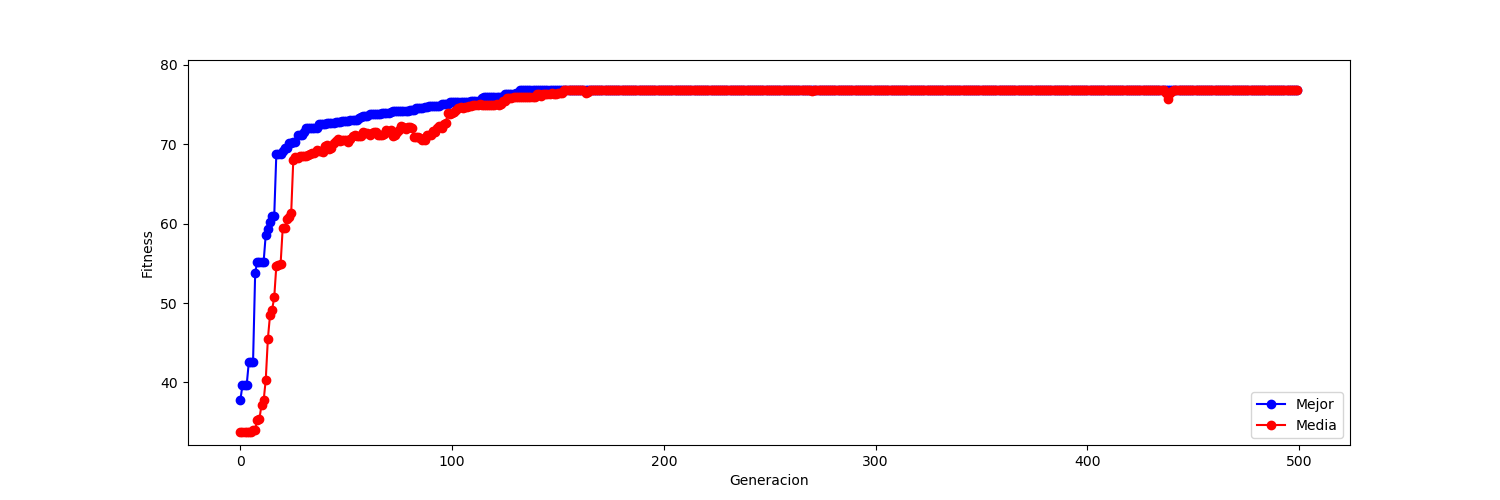

In [5]:
Image(filename="Graficas/tictactoe_tamPobla200_numG500.png")

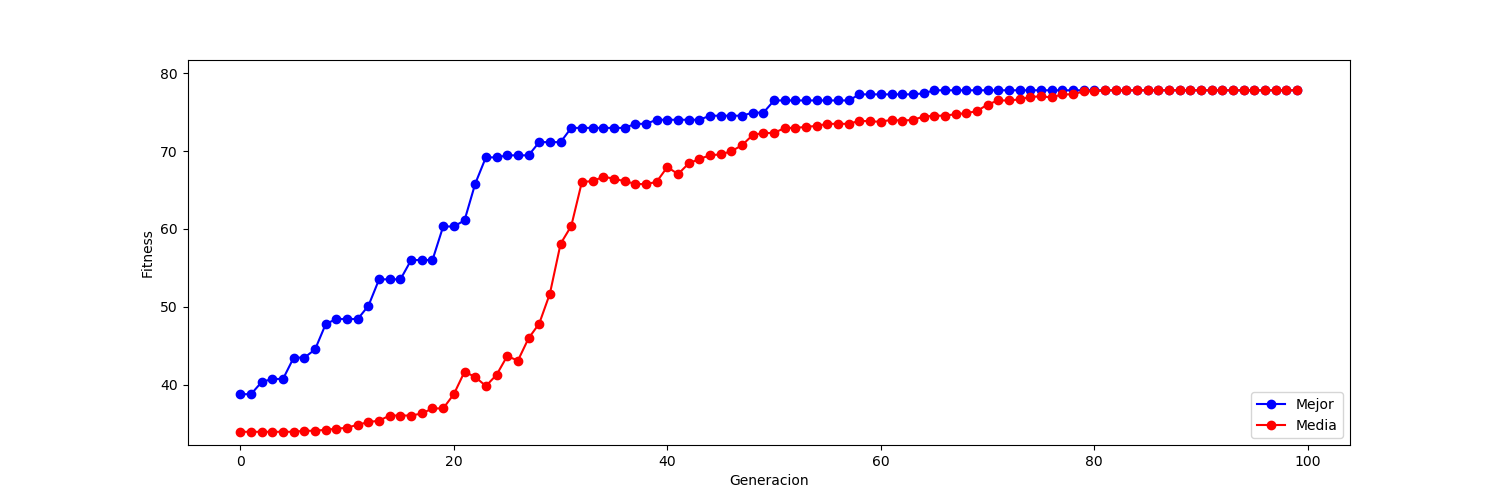

In [6]:
Image(filename="Graficas/tictactoe_tamPobla500_numG100.png")

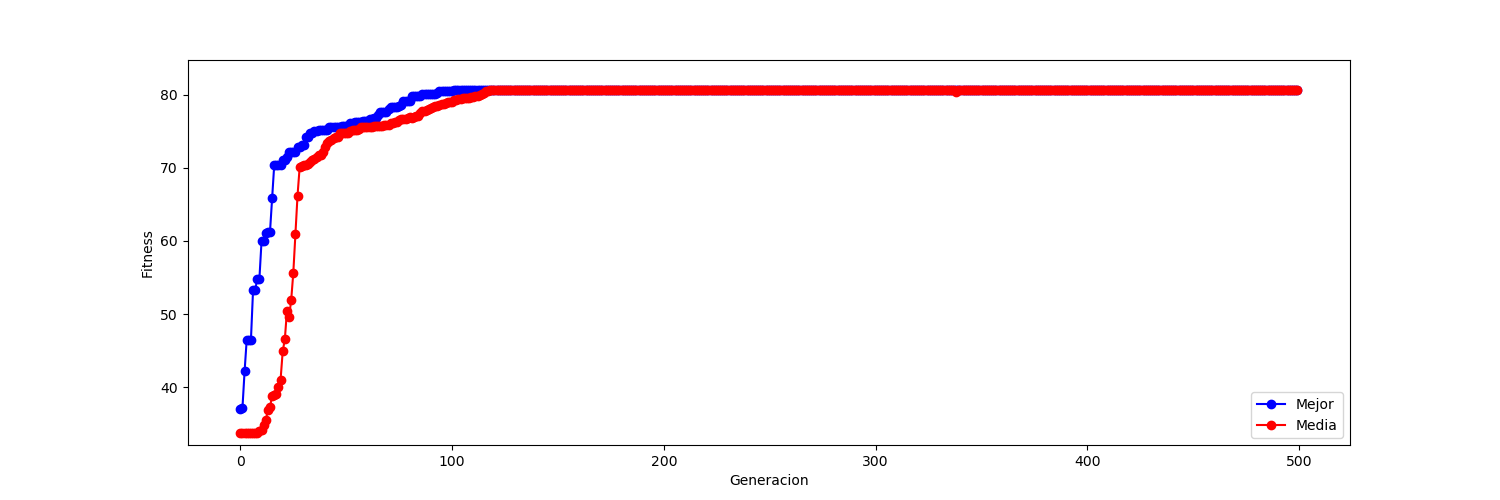

In [14]:
Image(filename="Graficas/tictactoe_tamPobla500_numG500.png")

#### example2:

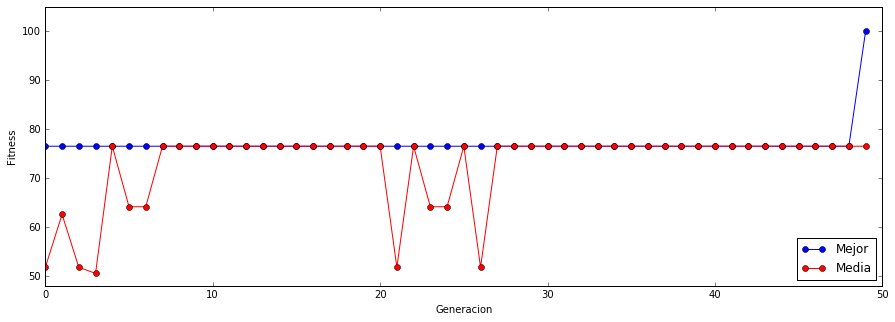

In [8]:
Image(filename="Graficas/example2_tamPobla10_numG100.png")

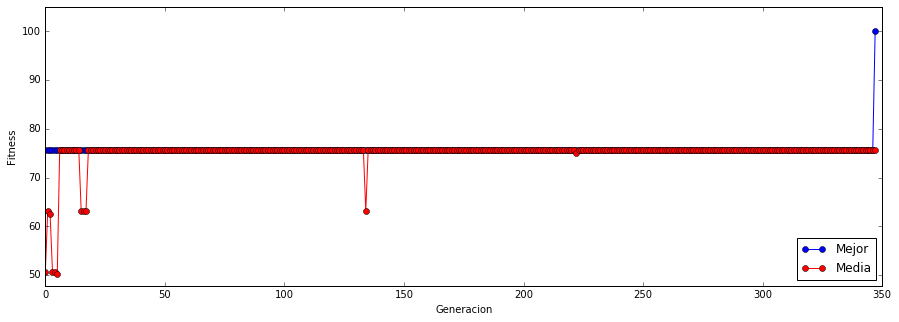

In [9]:
Image(filename="Graficas/example2_tamPobla10_numG500.png")

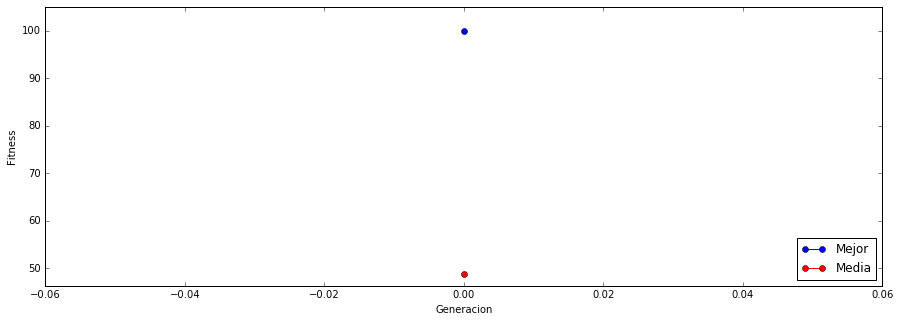

In [10]:
Image(filename="Graficas/example2_tamPobla200_numG100.png")

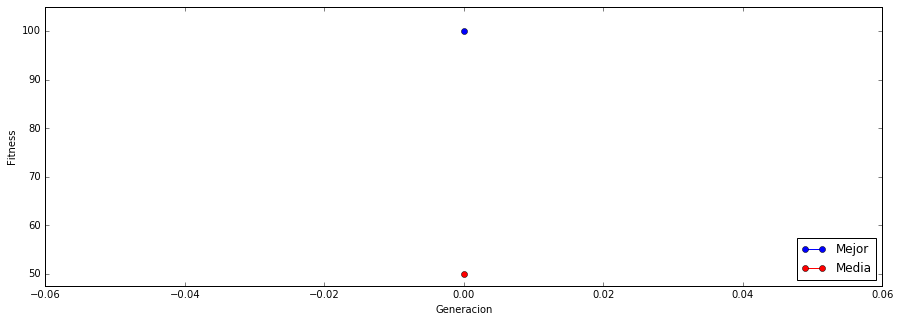

In [11]:
Image(filename="Graficas/example2_tamPobla200_numG500.png")

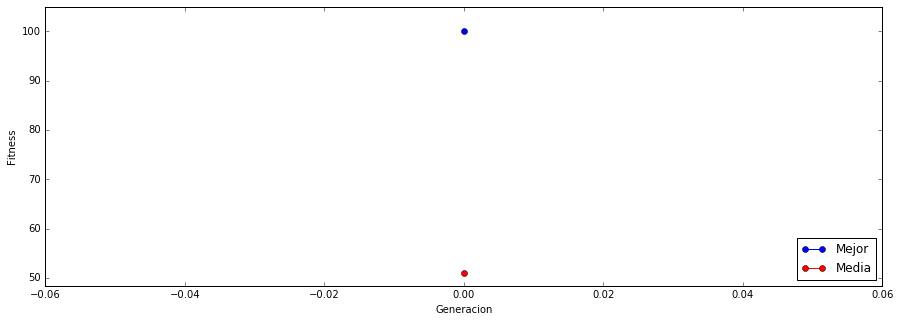

In [12]:
Image(filename="Graficas/example2_tamPobla500_numG100.png")

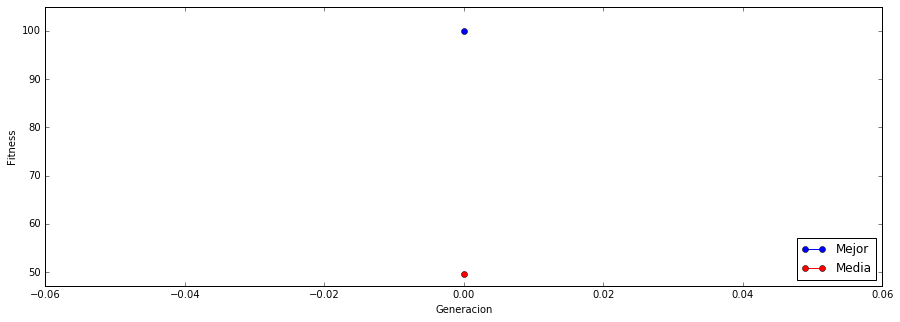

In [13]:
Image(filename="Graficas/example2_tamPobla500_numG500.png")

#### ejemplo5:

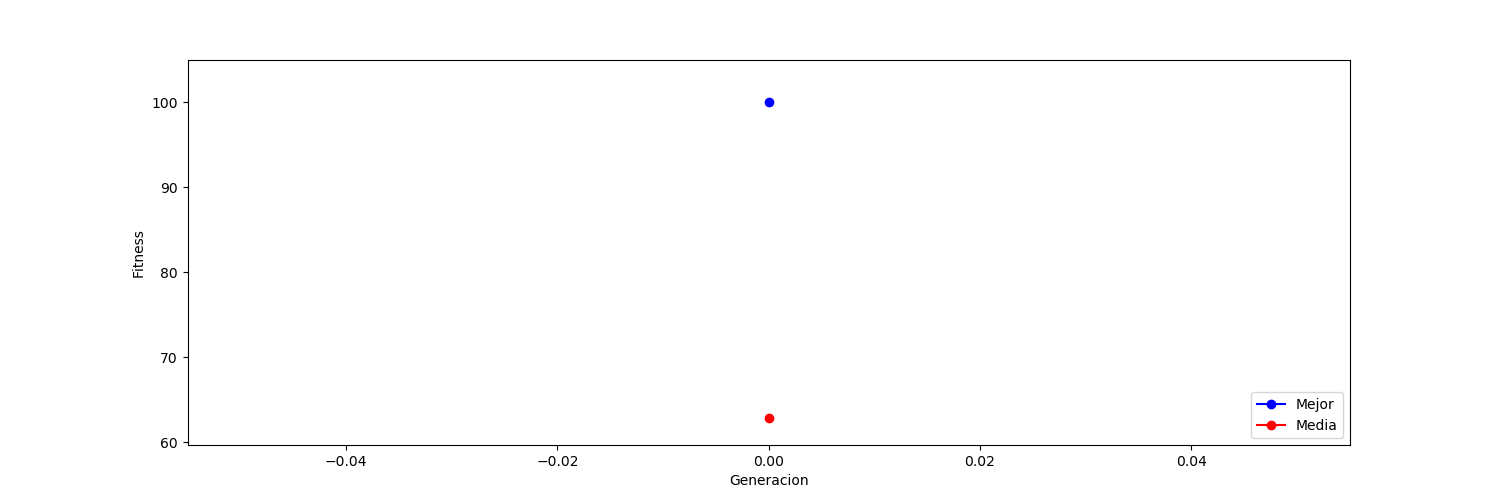

In [15]:
Image(filename="Graficas/example5_tamPobla10_numG100.png")

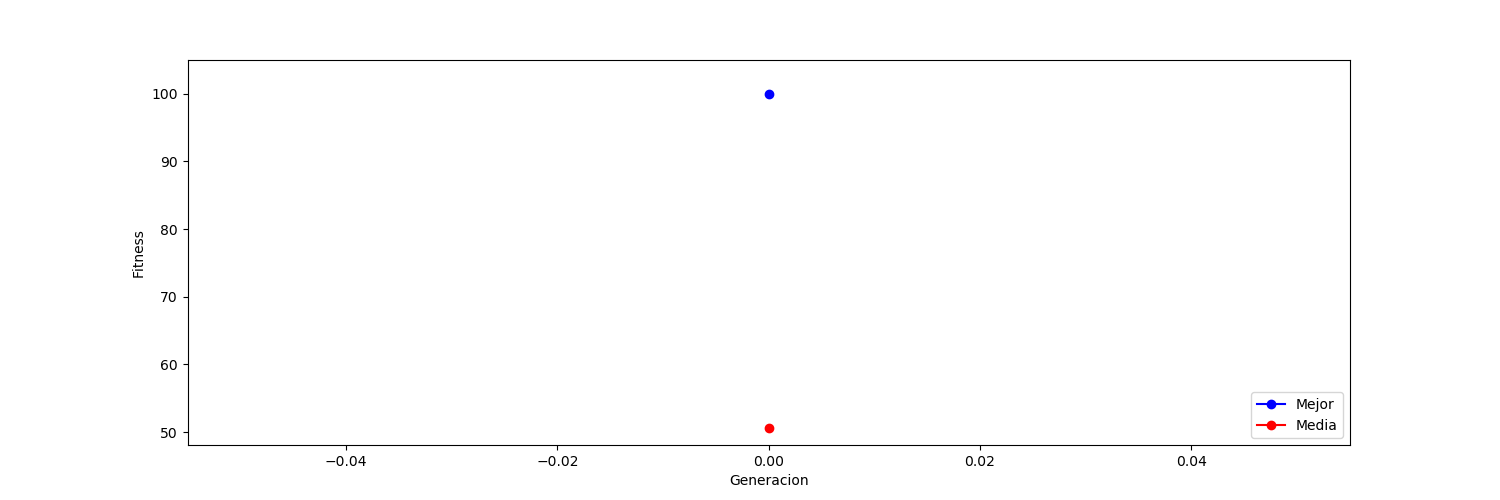

In [16]:
Image(filename="Graficas/example5_tamPobla10_numG500.png")

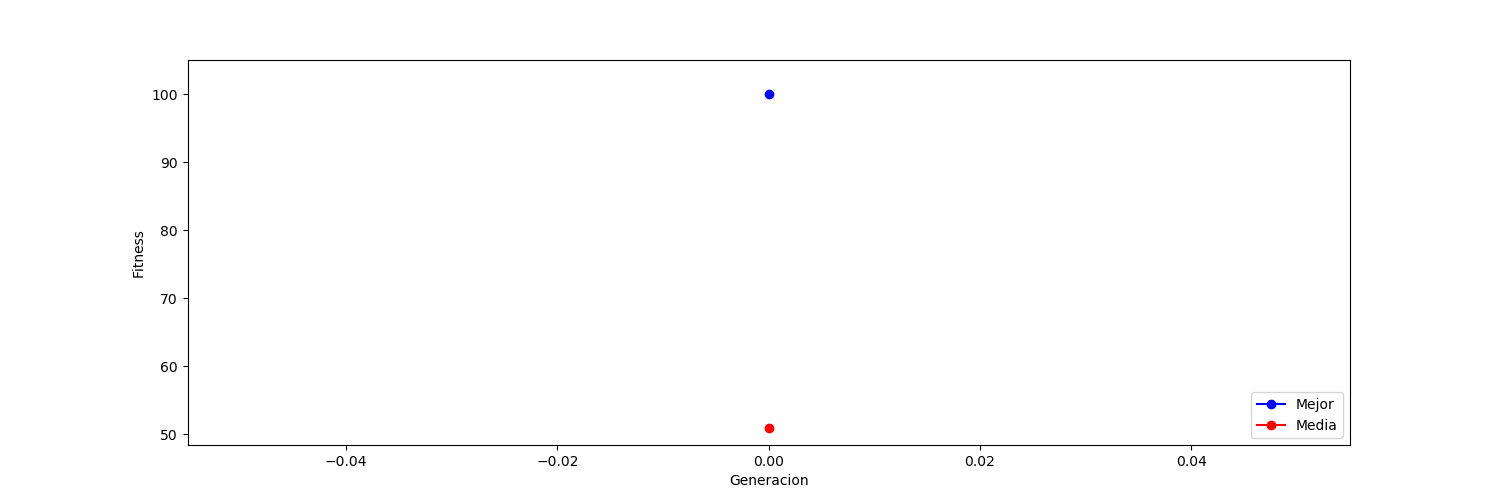

In [17]:
Image(filename="Graficas/example5_tamPobla200_numG100.png")

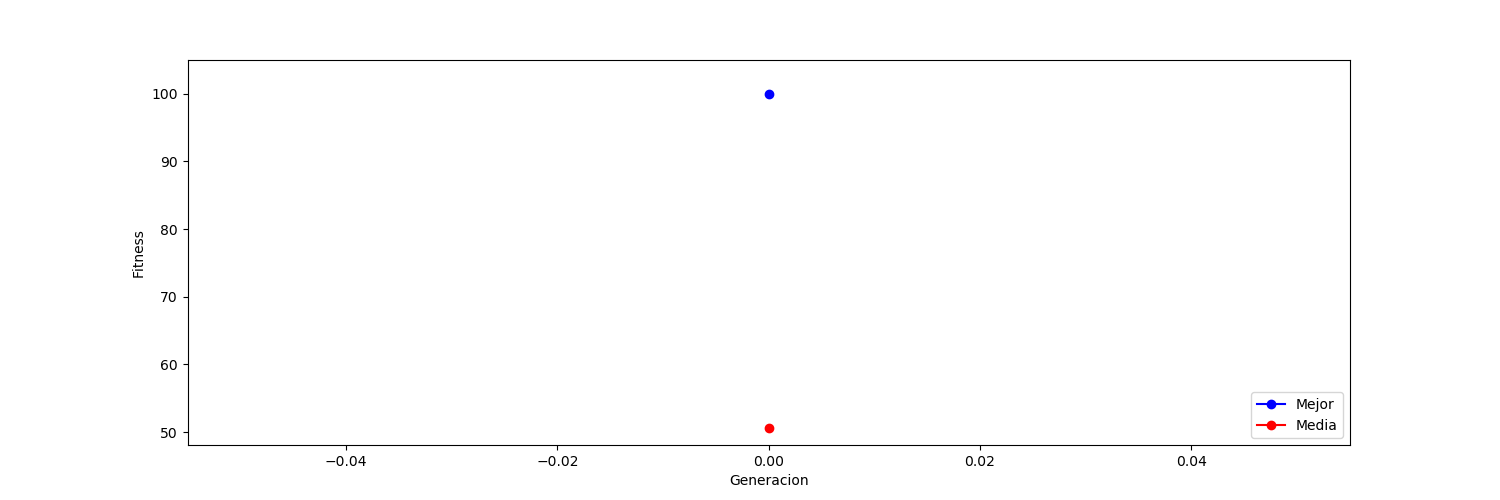

In [18]:
Image(filename="Graficas/example5_tamPobla200_numG500.png")

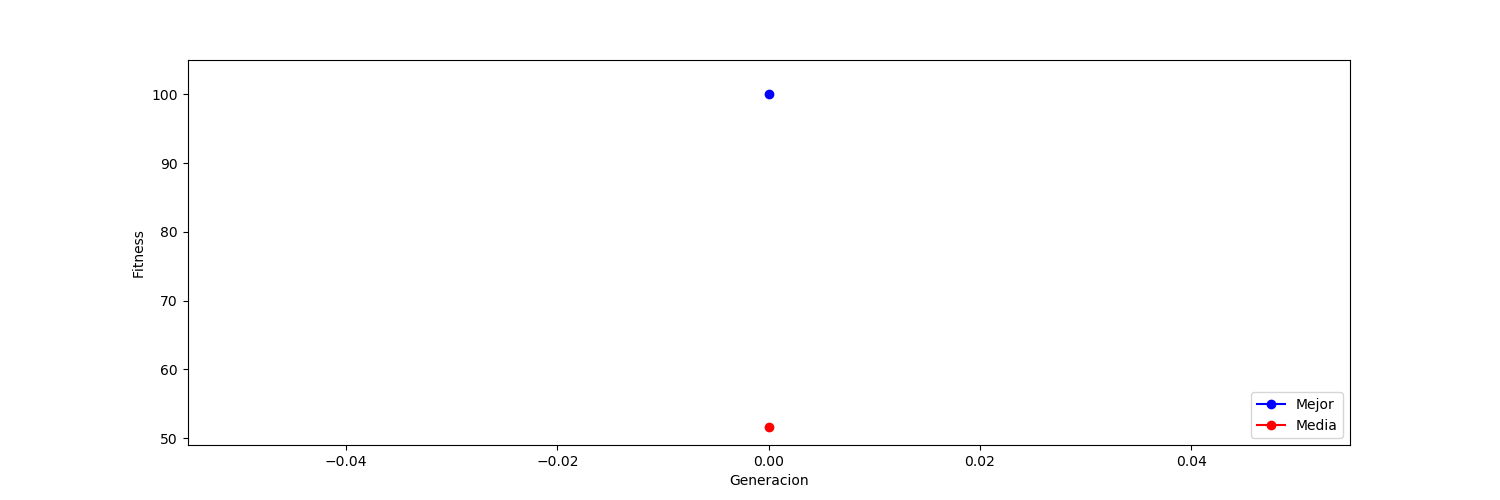

In [19]:
Image(filename="Graficas/example5_tamPobla500_numG100.png")

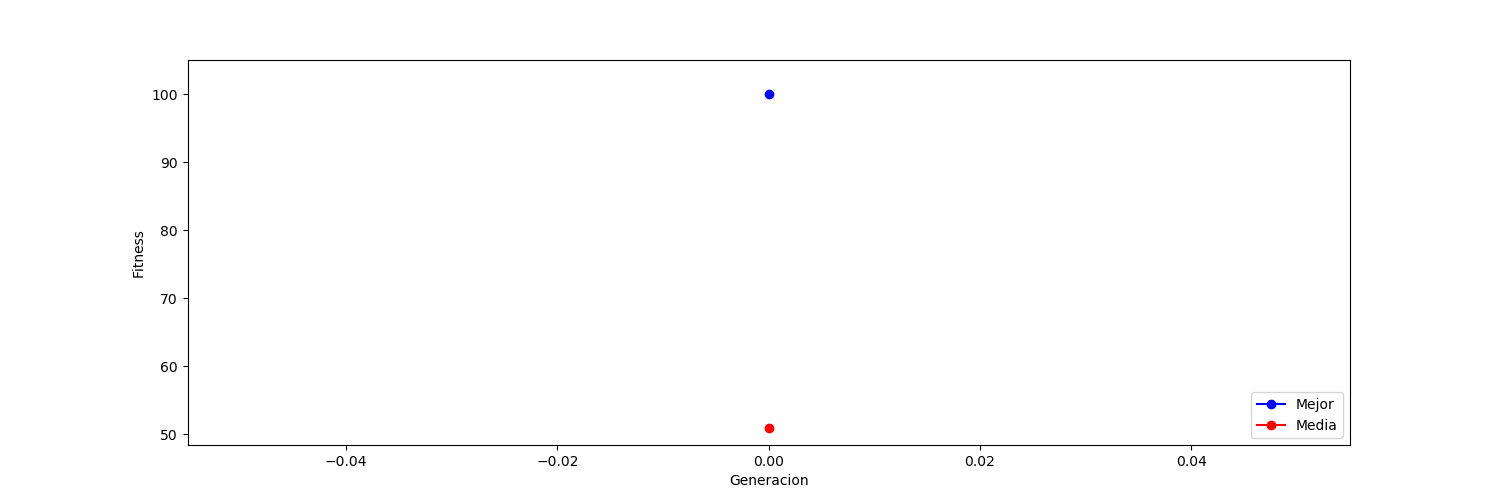

In [20]:
Image(filename="Graficas/example5_tamPobla500_numG500.png")

#### ejemplo6:

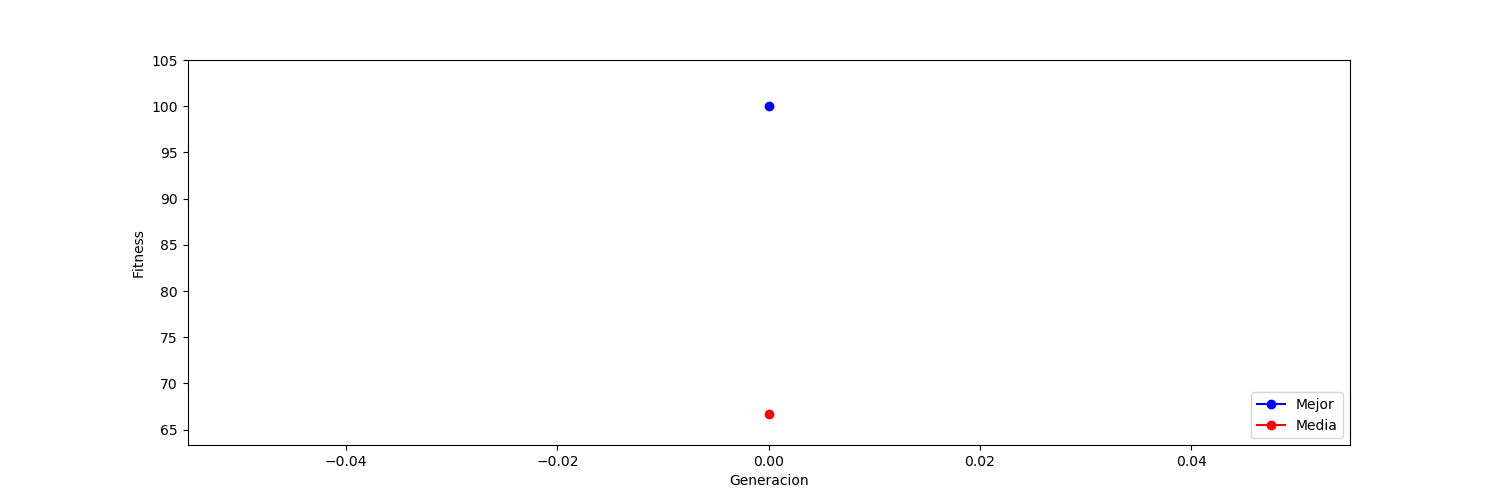

In [21]:
Image(filename="Graficas/example6_tamPobla10_numG100.png")

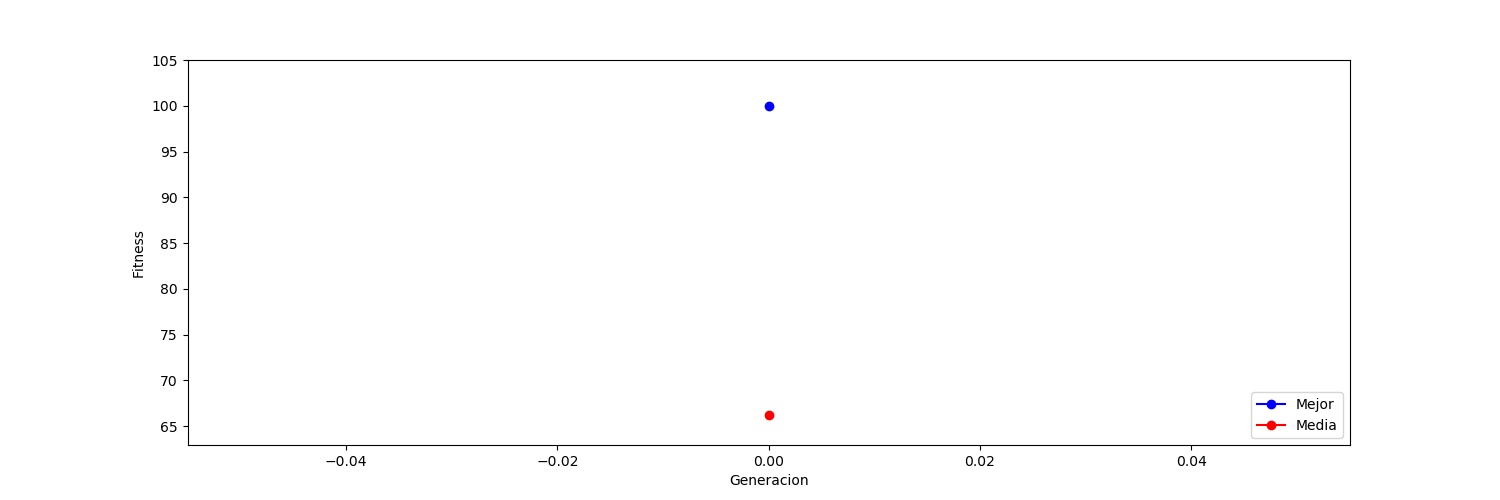

In [22]:
Image(filename="Graficas/example6_tamPobla10_numG500.png")

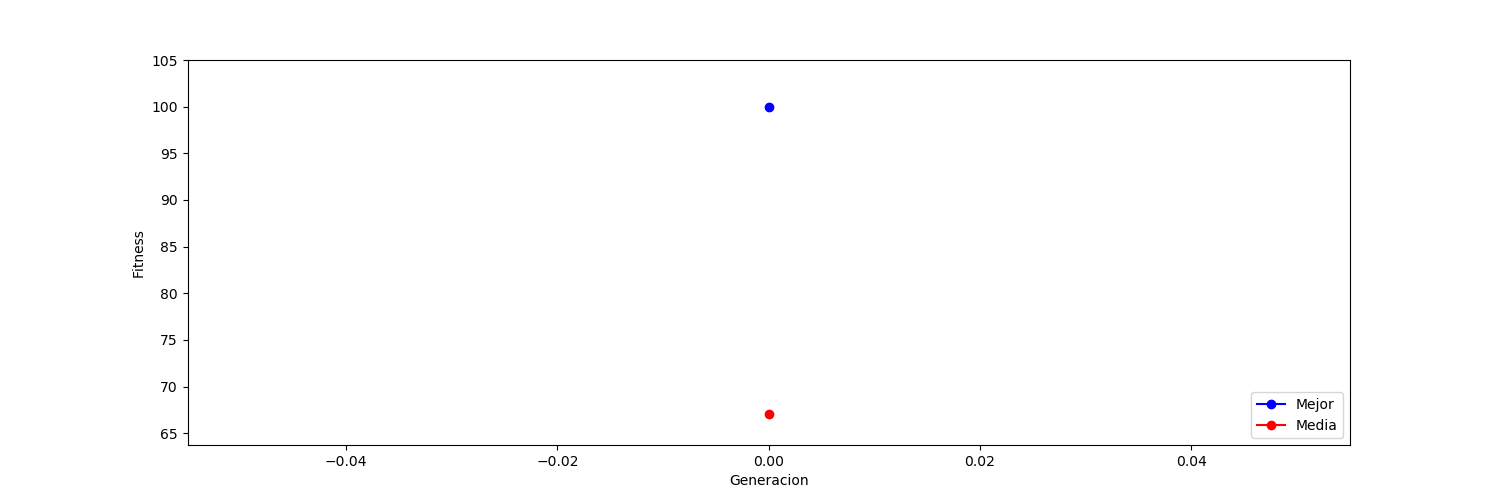

In [23]:
Image(filename="Graficas/example6_tamPobla200_numG100.png")

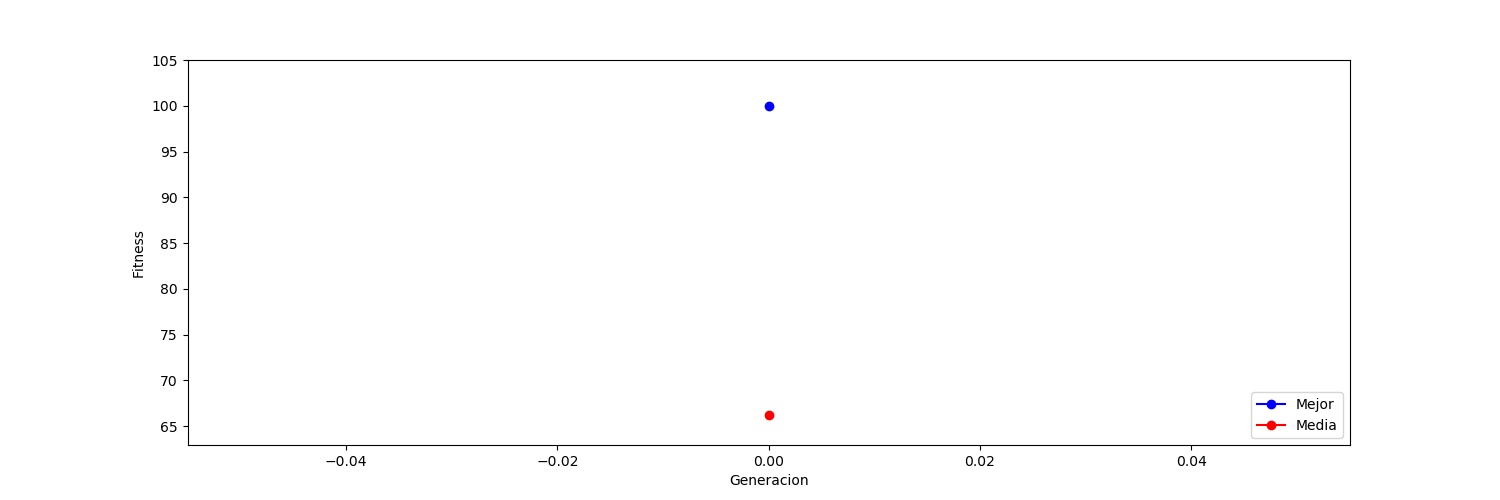

In [24]:
Image(filename="Graficas/example6_tamPobla200_numG500.png")

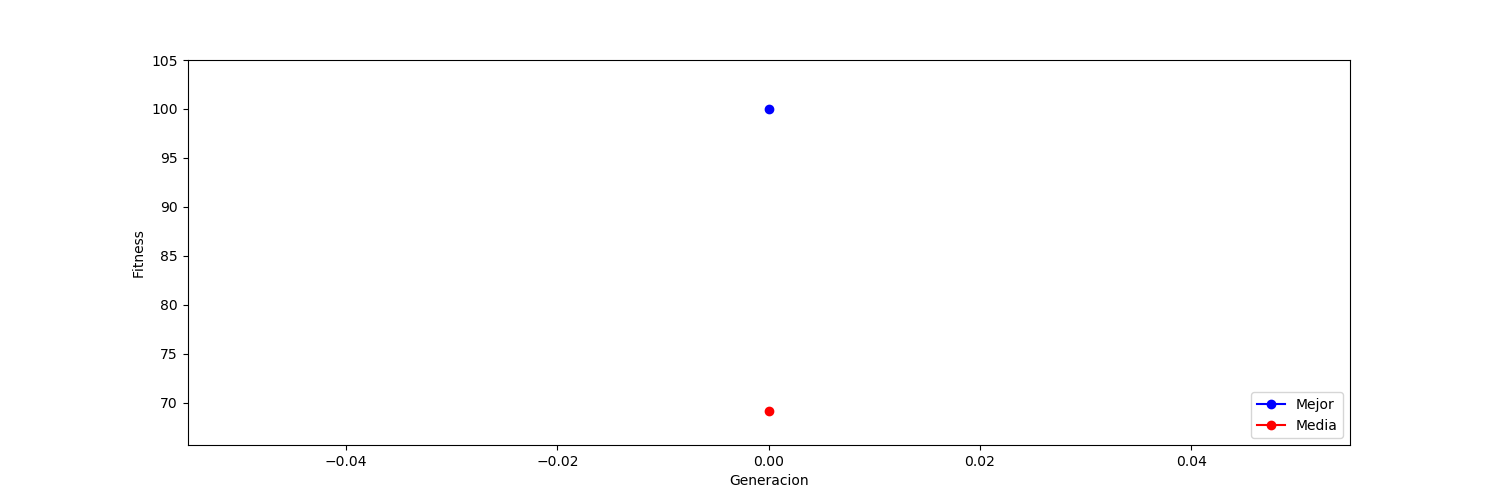

In [25]:
Image(filename="Graficas/example6_tamPobla500_numG100.png")

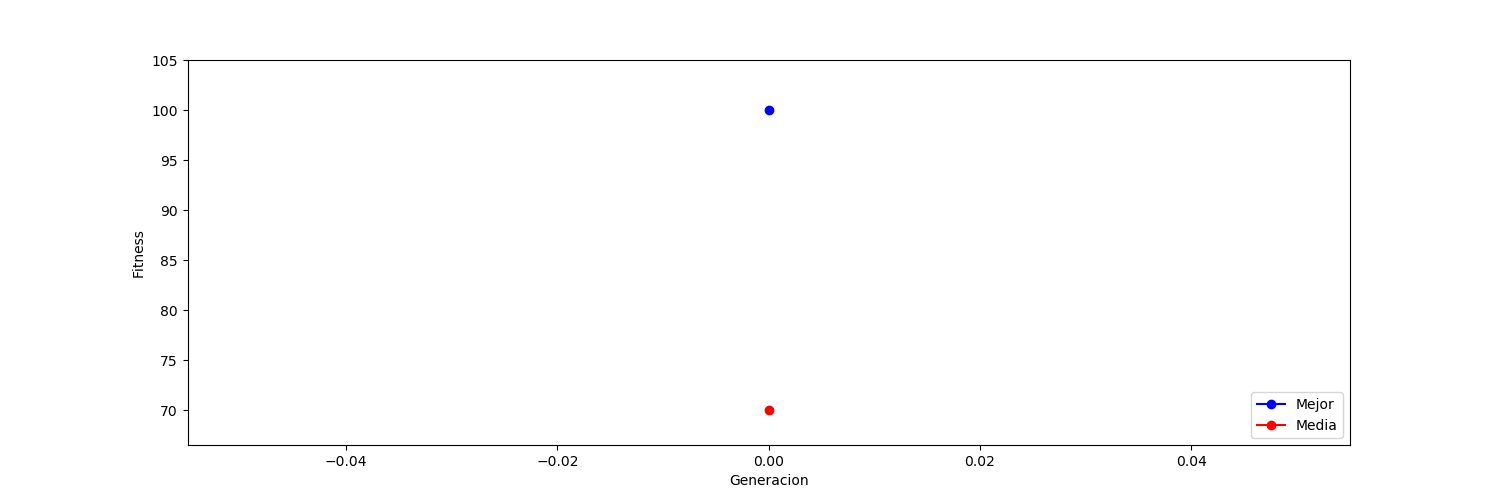

In [26]:
Image(filename="Graficas/example6_tamPobla500_numG500.png")

#### titanic:

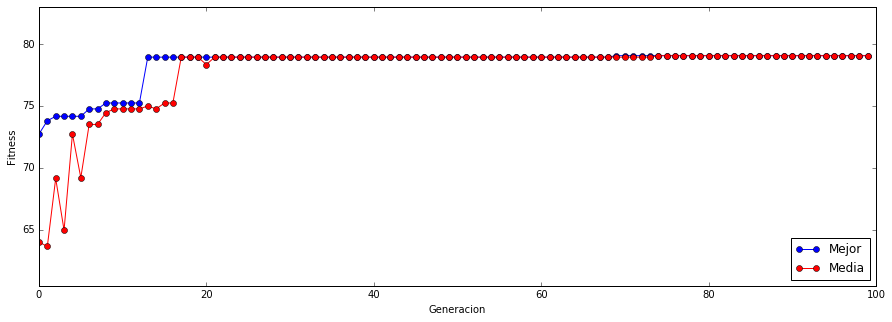

In [37]:
Image(filename="Graficas/titanic_tamPobla10_numG100.png")

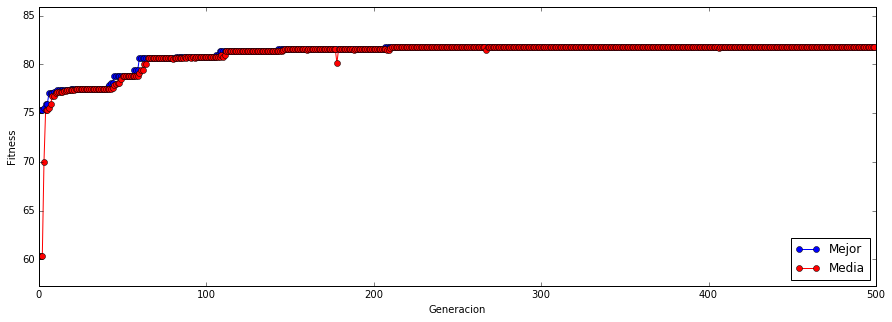

In [38]:
Image(filename="Graficas/titanic_tamPobla10_numG500.png")

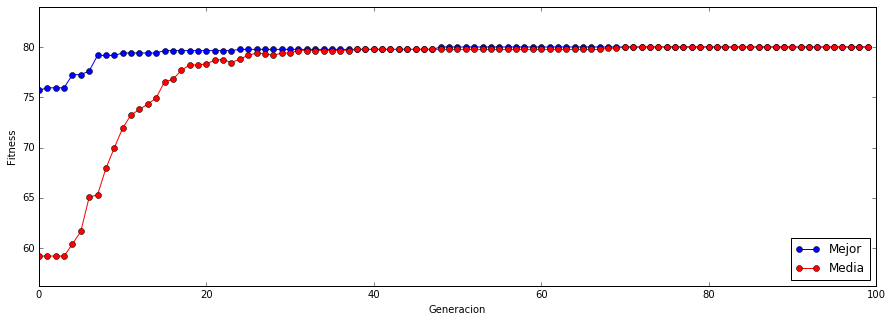

In [39]:
Image(filename="Graficas/titanic_tamPobla200_numG100.png")

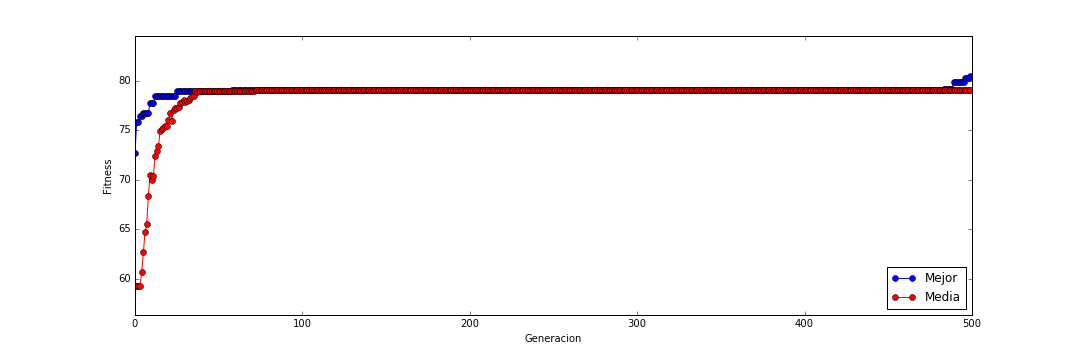

In [40]:
Image(filename="Graficas/titanic_tamPobla200_numG500.png")

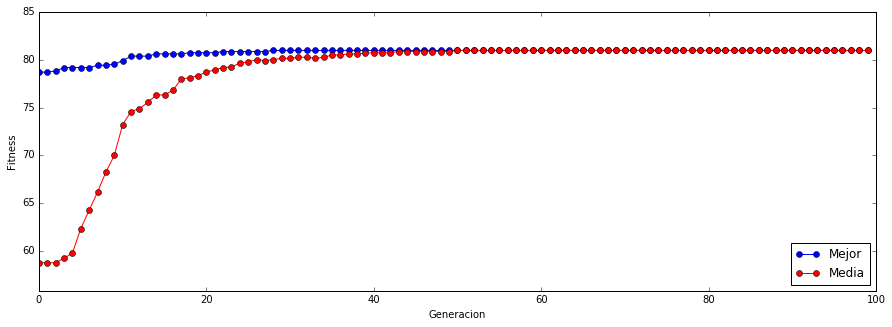

In [41]:
Image(filename="Graficas/titanic_tamPobla500_numG100.png")

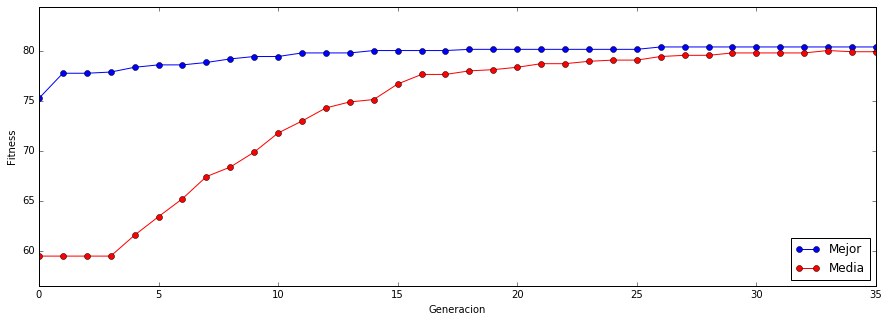

In [42]:
Image(filename="Graficas/titanic_tamPobla500_numG500.png")